In [7]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [8]:
import os
os.listdir('/content/gdrive/My Drive/Colab Notebooks/Data_sets/txt_sentoken')

['pos', 'neg']

In [0]:
from sklearn.datasets import load_files

In [10]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [0]:
reviews = load_files('/content/gdrive/My Drive/Colab Notebooks/Data_sets/txt_sentoken')

In [0]:
X,y = reviews.data,reviews.target

In [0]:
import re
corpus = []
for i in range(0, 2000):
    review = re.sub(r'\W', ' ', str(X[i]))
    review = review.lower()
    review = re.sub(r'^br$', ' ', review)
    review = re.sub(r'\s+br\s+',' ',review)
    review = re.sub(r'\s+[a-z]\s+', ' ',review)
    review = re.sub(r'^b\s+', '', review)
    review = re.sub(r'\s+', ' ', review)
    corpus.append(review)

In [14]:
import numpy as np
np.asarray(corpus).shape

(2000,)

In [0]:
from sklearn.feature_extraction.text import CountVectorizer##BOW
vectorizer = CountVectorizer(max_features = 2000, min_df = 3, max_df = 0.6, stop_words = stopwords.words('english'))
X = vectorizer.fit_transform(corpus).toarray()

In [0]:
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer()
X = transformer.fit_transform(X).toarray()

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer## dont need to pass BOW
vectorizer = TfidfVectorizer(max_features = 2000, min_df = 3, max_df = 0.6, stop_words = stopwords.words('english'))
X = vectorizer.fit_transform(corpus).toarray()

In [0]:
from sklearn.model_selection import train_test_split
text_train, text_test, sent_train, sent_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [19]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(text_train,sent_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [0]:
sent_pred = classifier.predict(text_test)


from sklearn.metrics import confusion_matrix
cm = confusion_matrix(sent_test, sent_pred)


In [21]:
cm

array([[168,  40],
       [ 21, 171]])

In [0]:
import pickle

# Saving our classifier
with open('classifier.pickle','wb') as f:
    pickle.dump(classifier,f)
    
    
# Saving the Tf-Idf model
with open('tfidfmodel.pickle','wb') as f:
    pickle.dump(vectorizer,f)

In [0]:
from sklearn.naive_bayes import BernoulliNB 

In [25]:
clf = BernoulliNB()
clf.fit(text_train,sent_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [0]:
sent_pred = clf.predict(text_test)


In [27]:
confusion_matrix(sent_test, sent_pred)

array([[176,  32],
       [ 39, 153]])

In [0]:
import pickle 

with open('classifier.pickle','wb') as f:
    pickle.dump(classifier,f)
    
with open('tfidfmodel.pickle','wb') as f:
    pickle.dump(vectorizer,f)

In [0]:
with open('tfidfmodel.pickle','rb') as f:
    tfidf = pickle.load(f)
    
with open('classifier.pickle','rb') as f:
    clf = pickle.load(f)
    
    
sample = ["You are a nice person man, have a good life"]
sample = tfidf.transform(sample).toarray()
sentiment = clf.predict(sample)


In [0]:
sentiment

array([1])

In [0]:
clf.predict_proba(sample)

array([[0.22679192, 0.77320808]])

In [0]:
consumer_key = '3Hl5Ilq4gEwW13kC5prMDI5ao'
consumer_secret = 'VS4Wc2REWuJIbnlcx3Cj90lKyMJGA9e8etBrrVsLjZdgVlK6Lb' 
access_token = '2183088190-3idIUXkbhDAxNCwXku06QKNMXiSq0DgMUY5mcTc'
access_secret ='SWyutClfD0bG6UvJwvNX6Zn0q2zO9yfS8GwHjRYbdbXzi'

In [0]:
import tweepy
from tweepy import OAuthHandler
auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
args = ['Pulwama'];
api = tweepy.API(auth,timeout=10)

In [0]:
list_tweets = []


In [0]:
query = args[0]

In [0]:
if len(args) == 1:
    for status in tweepy.Cursor(api.search,q=query+" -filter:retweets",lang='en',result_type='recent').items(100):
        list_tweets.append(status.text)


In [0]:
list_tweets

["@iam_sidrah @Carvaa_e_Aman Isn't it hypocracy.?? You Pakistani people doesnt know that Likes of Masood Azhar, hafee… https://t.co/IRT6LsATt5",
 "Why isn't this trending?\n\nNepal in solidarity with India condemns Pulwama terror attack, protests erupt in many par… https://t.co/5ZfT95U4Fl",
 '@HinaRKhar It is horrific to see the ugliness pouring out of India in the aftermath of Pulwama. Leaves us in no dou… https://t.co/aKR1dhTQPz',
 'Those who are online, to discuss "The Military History of India and Pakistan: Takeaways in the Aftermath of Pulwama… https://t.co/XTIEyE228p',
 'Narendra Modi using Pulwama tragedy for political gain: Omar Abdullah, former chief minister of Jammu and Kashmir -… https://t.co/UzyVJj0awX',
 'Nearly 10,000 Troops Airlifted To Srinagar Amid Major Crackdown In J&amp;K. \nIndia is up to some mischief in the valley… https://t.co/3FnVrQteTH',
 'Nishu Barolia is a travel blogger operating an IG handle “tannedtravelgirl” hvng a follower base of &gt; 7,700 users.… ht

In [0]:
with open('classifier.pickle','rb') as f:
    classifier = pickle.load(f)
    
with open('tfidfmodel.pickle','rb') as f:
    tfidf = pickle.load(f)    
    
total_pos = 0
total_neg = 0

In [0]:
for tweet in list_tweets:
    tweet = re.sub(r"^https://t.co/[a-zA-Z0-9]*\s", " ", tweet)
    tweet = re.sub(r"\s+https://t.co/[a-zA-Z0-9]*\s", " ", tweet)
    tweet = re.sub(r"\s+https://t.co/[a-zA-Z0-9]*$", " ", tweet)
    tweet = tweet.lower()
    tweet = re.sub(r"that's","that is",tweet)
    tweet = re.sub(r"there's","there is",tweet)
    tweet = re.sub(r"what's","what is",tweet)
    tweet = re.sub(r"where's","where is",tweet)
    tweet = re.sub(r"it's","it is",tweet)
    tweet = re.sub(r"who's","who is",tweet)
    tweet = re.sub(r"i'm","i am",tweet)
    tweet = re.sub(r"she's","she is",tweet)
    tweet = re.sub(r"he's","he is",tweet)
    tweet = re.sub(r"they're","they are",tweet)
    tweet = re.sub(r"who're","who are",tweet)
    tweet = re.sub(r"ain't","am not",tweet)
    tweet = re.sub(r"wouldn't","would not",tweet)
    tweet = re.sub(r"shouldn't","should not",tweet)
    tweet = re.sub(r"can't","can not",tweet)
    tweet = re.sub(r"couldn't","could not",tweet)
    tweet = re.sub(r"won't","will not",tweet)
    tweet = re.sub(r"\W"," ",tweet)
    tweet = re.sub(r"\d"," ",tweet)
    tweet = re.sub(r"\s+[a-z]\s+"," ",tweet)
    tweet = re.sub(r"\s+[a-z]$"," ",tweet)
    tweet = re.sub(r"^[a-z]\s+"," ",tweet)
    tweet = re.sub(r"\s+"," ",tweet)
    sent = classifier.predict(tfidf.transform([tweet]).toarray())
    if sent[0] == 1:
        total_pos += 1
    else:
        total_neg += 1
    


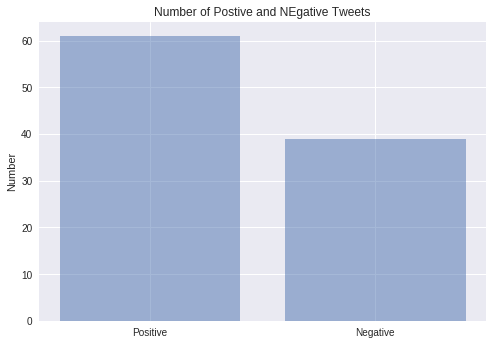

In [0]:
import matplotlib.pyplot as plt
import numpy as np
objects = ['Positive','Negative']
y_pos = np.arange(len(objects))

plt.bar(y_pos,[total_pos,total_neg],alpha=0.5)
plt.xticks(y_pos,objects)
plt.ylabel('Number')
plt.title('Number of Postive and NEgative Tweets')

plt.show()

In [0]:
total_pos

61